Weather meta data - https://www.worldweatheronline.com/weather-api/api/docs/local-city-town-weather-api.aspx

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


import warnings
warnings.filterwarnings("ignore")


In [2]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [3]:
file_path = '/content/drive/MyDrive/MLOps/all_merged_zones_weather_demand_data.csv'
with open(file_path, 'r') as file:
    content = file.read()



In [4]:
df_all = pd.read_csv(file_path)

In [5]:
df_all.head(5)

,datetime,tempF,windspeedMiles,weatherCode,precipMM,precipInches,humidity,visibility,visibilityMiles,pressure,...,WindChillF,WindGustMiles,WindGustKmph,FeelsLikeC,FeelsLikeF,uvIndex,subba-name,value,value-units,zone
0,2019-06-05T17,82,12,176,0.3,0.0,81,9,5,1008,...,82,23,36,32,90,6,ERCO - Coast,13395,megawatthours,COAS
1,2019-06-05T17,85,6,113,0.0,0.0,25,10,6,1008,...,85,9,14,29,84,7,ERCO - Far West,3442,megawatthours,FWES
2,2019-06-05T17,81,11,356,5.8,0.2,65,10,6,1009,...,81,17,28,30,85,6,ERCO - North Central,14665,megawatthours,NCEN
3,2019-06-05T17,84,6,116,0.0,0.0,62,10,6,1008,...,84,13,20,31,89,7,ERCO - North,1175,megawatthours,NRTH
4,2019-06-05T17,84,4,116,0.0,0.0,68,9,5,1008,...,84,10,16,33,91,7,ERCO - South Central,7760,megawatthours,SCEN


In [6]:
max(df_all['datetime'])

'2023-12-31T00'

In [7]:
min(df_all['datetime'])

'2019-06-05T17'

So data is existing from June 5th,2019 (5:00pm) to Dec 31st,2023 (12:00 am)

In [8]:
df = df_all[df_all['datetime'] < '2022-12-31T23']

In [9]:
df.head()

,datetime,tempF,windspeedMiles,weatherCode,precipMM,precipInches,humidity,visibility,visibilityMiles,pressure,...,WindChillF,WindGustMiles,WindGustKmph,FeelsLikeC,FeelsLikeF,uvIndex,subba-name,value,value-units,zone
0,2019-06-05T17,82,12,176,0.3,0.0,81,9,5,1008,...,82,23,36,32,90,6,ERCO - Coast,13395,megawatthours,COAS
1,2019-06-05T17,85,6,113,0.0,0.0,25,10,6,1008,...,85,9,14,29,84,7,ERCO - Far West,3442,megawatthours,FWES
2,2019-06-05T17,81,11,356,5.8,0.2,65,10,6,1009,...,81,17,28,30,85,6,ERCO - North Central,14665,megawatthours,NCEN
3,2019-06-05T17,84,6,116,0.0,0.0,62,10,6,1008,...,84,13,20,31,89,7,ERCO - North,1175,megawatthours,NRTH
4,2019-06-05T17,84,4,116,0.0,0.0,68,9,5,1008,...,84,10,16,33,91,7,ERCO - South Central,7760,megawatthours,SCEN


In [10]:
max(df['datetime'])

'2022-12-31T00'

In [11]:
min(df['datetime'])

'2019-06-05T17'

In [12]:
df.shape

(325000, 27)

Taking up six months data from 2019-06-05 to 2019-12-31

# Data Inspection

In [13]:
df.describe(include='all')

,datetime,tempF,windspeedMiles,weatherCode,precipMM,precipInches,humidity,visibility,visibilityMiles,pressure,...,WindChillF,WindGustMiles,WindGustKmph,FeelsLikeC,FeelsLikeF,uvIndex,subba-name,value,value-units,zone
count,325000,325000.000000,325000.000000,325000.000000,325000.000000,325000.000000,325000.000000,325000.000000,325000.000000,325000.000000,...,325000.000000,325000.000000,325000.000000,325000.000000,325000.000000,325000.000000,325000,325000.000000,325000,325000.0
unique,20000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,16,NaN,1,22.0
top,2022-12-31T00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ISNE - Northeast Mass.,NaN,megawatthours,4008.0
freq,18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,35000,NaN,325000,35000.0
mean,NaN,66.223428,8.186545,131.484274,0.114336,0.003542,65.112022,9.386745,5.566452,1015.782351,...,64.975289,14.001031,22.531135,19.132978,66.431018,3.149258,NaN,3866.408071,NaN,NaN
std,NaN,17.780551,4.150953,52.088456,0.558466,0.023119,20.322273,1.778107,1.167796,6.503165,...,19.742390,6.285287,10.114158,11.743928,21.131692,2.603752,NaN,4402.890248,NaN,NaN
min,NaN,-1.000000,0.000000,113.000000,0.000000,0.000000,7.000000,0.000000,0.000000,972.000000,...,-19.000000,0.000000,1.000000,-28.000000,-19.000000,1.000000,NaN,192.000000,NaN,NaN
25%,NaN,55.000000,5.000000,113.000000,0.000000,0.000000,50.000000,10.000000,6.000000,1012.000000,...,53.000000,9.000000,15.000000,12.000000,53.000000,1.000000,NaN,1285.000000,NaN,NaN
50%,NaN,69.000000,8.000000,113.000000,0.000000,0.000000,67.000000,10.000000,6.000000,1015.000000,...,68.000000,13.000000,21.000000,20.000000,68.000000,1.000000,NaN,2023.000000,NaN,NaN
75%,NaN,80.000000,11.000000,119.000000,0.000000,0.000000,82.000000,10.000000,6.000000,1020.000000,...,80.000000,18.000000,29.000000,28.000000,82.000000,6.000000,NaN,4006.000000,NaN,NaN


In [14]:
df.dtypes

,0
datetime,object
tempF,int64
windspeedMiles,int64
weatherCode,int64
precipMM,float64
precipInches,float64
humidity,int64
visibility,int64
visibilityMiles,int64
pressure,int64


In [15]:
df['value-units'].unique()

array(['megawatthours'], dtype=object)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 325000 entries, 0 to 384999
Data columns (total 27 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   datetime         325000 non-null  object 
 1   tempF            325000 non-null  int64  
 2   windspeedMiles   325000 non-null  int64  
 3   weatherCode      325000 non-null  int64  
 4   precipMM         325000 non-null  float64
 5   precipInches     325000 non-null  float64
 6   humidity         325000 non-null  int64  
 7   visibility       325000 non-null  int64  
 8   visibilityMiles  325000 non-null  int64  
 9   pressure         325000 non-null  int64  
 10  pressureInches   325000 non-null  int64  
 11  cloudcover       325000 non-null  int64  
 12  HeatIndexC       325000 non-null  int64  
 13  HeatIndexF       325000 non-null  int64  
 14  DewPointC        325000 non-null  int64  
 15  DewPointF        325000 non-null  int64  
 16  WindChillC       325000 non-null  int64  
 

# Handling missing values

In [17]:
df.isnull().sum()

,0
datetime,0
tempF,0
windspeedMiles,0
weatherCode,0
precipMM,0
precipInches,0
humidity,0
visibility,0
visibilityMiles,0
pressure,0


No missing values

In [18]:
df[df.duplicated()]

,datetime,tempF,windspeedMiles,weatherCode,precipMM,precipInches,humidity,visibility,visibilityMiles,pressure,...,WindChillF,WindGustMiles,WindGustKmph,FeelsLikeC,FeelsLikeF,uvIndex,subba-name,value,value-units,zone
355001,2020-06-05T17,80,11,119,0.0,0.0,56,9,5,1010,...,80,20,31,28,83,6,ISNE - Northeast Mass.,3174,megawatthours,4008
355003,2020-06-05T18,78,12,119,0.0,0.0,59,9,5,1010,...,78,18,29,27,81,1,ISNE - Northeast Mass.,3197,megawatthours,4008
355005,2020-06-05T19,76,12,119,0.0,0.0,61,10,5,1010,...,76,18,30,26,79,1,ISNE - Northeast Mass.,3219,megawatthours,4008
355007,2020-06-05T20,75,12,119,0.0,0.0,64,10,6,1010,...,75,19,30,26,78,1,ISNE - Northeast Mass.,3320,megawatthours,4008
355009,2020-06-05T21,74,12,119,0.0,0.0,67,10,6,1010,...,74,19,31,25,77,1,ISNE - Northeast Mass.,3403,megawatthours,4008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
384995,2022-12-30T22,42,10,113,0.0,0.0,82,10,6,1023,...,37,18,28,3,37,1,ISNE - Northeast Mass.,2748,megawatthours,4008
384996,2022-12-30T23,42,8,113,0.0,0.0,82,10,6,1023,...,37,16,26,3,37,1,ISNE - Northeast Mass.,2820,megawatthours,4008
384997,2022-12-30T23,36,5,116,0.0,0.0,93,10,6,1024,...,32,10,16,0,32,1,ISNE - Western/Central Mass.,1969,megawatthours,4007
384998,2022-12-31T00,36,5,116,0.0,0.0,94,10,6,1024,...,31,10,16,0,31,1,ISNE - Western/Central Mass.,1932,megawatthours,4007


In [19]:
import pandas as pd

# Assuming 'df' is your DataFrame with a datetime index
# First, ensure the 'datetime' column is in datetime format and set it as the index
df['datetime'] = pd.to_datetime(df['datetime'])
df.set_index('datetime', inplace=True)

# Define the rolling window size (e.g., 6 hours). Adjust it based on your frequency (if data is hourly, 6 hours is window=6)
window_size = 6

# Compute rolling mean and standard deviation for 'tempF', 'windspeedMiles', and 'humidity'
df['tempF_rolling_mean'] = df['tempF'].rolling(window=window_size).mean()
df['tempF_rolling_std'] = df['tempF'].rolling(window=window_size).std()

df['windspeedMiles_rolling_mean'] = df['windspeedMiles'].rolling(window=window_size).mean()
df['windspeedMiles_rolling_std'] = df['windspeedMiles'].rolling(window=window_size).std()

df['humidity_rolling_mean'] = df['humidity'].rolling(window=window_size).mean()
df['humidity_rolling_std'] = df['humidity'].rolling(window=window_size).std()

# Display the resulting DataFrame with the new rolling statistics columns
(df[['tempF', 'tempF_rolling_mean', 'tempF_rolling_std', 'windspeedMiles', 'windspeedMiles_rolling_mean', 'windspeedMiles_rolling_std', 'humidity', 'humidity_rolling_mean', 'humidity_rolling_std']].head())


,tempF,tempF_rolling_mean,tempF_rolling_std,windspeedMiles,windspeedMiles_rolling_mean,windspeedMiles_rolling_std,humidity,humidity_rolling_mean,humidity_rolling_std
datetime,,,,,,,,,
2019-06-05 17:00:00,82,NaN,NaN,12,NaN,NaN,81,NaN,NaN
2019-06-05 17:00:00,85,NaN,NaN,6,NaN,NaN,25,NaN,NaN
2019-06-05 17:00:00,81,NaN,NaN,11,NaN,NaN,65,NaN,NaN
2019-06-05 17:00:00,84,NaN,NaN,6,NaN,NaN,62,NaN,NaN
2019-06-05 17:00:00,84,NaN,NaN,4,NaN,NaN,68,NaN,NaN


In [20]:
import pandas as pd


# Define the number of lags (e.g., 1 hour, 2 hours, etc.)
# You can create multiple lags depending on your needs


# Create lag features for 'tempF', 'windspeedMiles', and 'humidity' for 2 hrs
df['tempF_lag_2'] = df['tempF'].shift(2)
df['windspeedMiles_lag_2'] = df['windspeedMiles'].shift(2)
df['humidity_lag_2'] = df['humidity'].shift(2)

# Create lag features for 'tempF', 'windspeedMiles', and 'humidity' for 4 hrs
df['tempF_lag_4'] = df['tempF'].shift(4)
df['windspeedMiles_lag_4'] = df['windspeedMiles'].shift(4)
df['humidity_lag_4'] = df['humidity'].shift(4)

#Create lag features for 'tempF', 'windspeedMiles', and 'humidity' for 6 hrs
df['tempF_lag_6'] = df['tempF'].shift(6)
df['windspeedMiles_lag_6'] = df['windspeedMiles'].shift(6)
df['humidity_lag_6'] = df['humidity'].shift(6)

# Display the resulting DataFrame with the new lag features
(df[['tempF', 'tempF_lag_2', 'tempF_lag_4', 'tempF_lag_6','windspeedMiles', 'windspeedMiles_lag_2', 'windspeedMiles_lag_4','windspeedMiles_lag_6', 'humidity', 'humidity_lag_2', 'humidity_lag_4','humidity_lag_6']].head())


,tempF,tempF_lag_2,tempF_lag_4,tempF_lag_6,windspeedMiles,windspeedMiles_lag_2,windspeedMiles_lag_4,windspeedMiles_lag_6,humidity,humidity_lag_2,humidity_lag_4,humidity_lag_6
datetime,,,,,,,,,,,,
2019-06-05 17:00:00,82,NaN,NaN,NaN,12,NaN,NaN,NaN,81,NaN,NaN,NaN
2019-06-05 17:00:00,85,NaN,NaN,NaN,6,NaN,NaN,NaN,25,NaN,NaN,NaN
2019-06-05 17:00:00,81,82.0,NaN,NaN,11,12.0,NaN,NaN,65,81.0,NaN,NaN
2019-06-05 17:00:00,84,85.0,NaN,NaN,6,6.0,NaN,NaN,62,25.0,NaN,NaN
2019-06-05 17:00:00,84,81.0,82.0,NaN,4,11.0,12.0,NaN,68,65.0,81.0,NaN


In [21]:
# Count the number of NaN values in each column
nan_per_column = df.isna().sum()
print(nan_per_column)


tempF                          0
windspeedMiles                 0
weatherCode                    0
precipMM                       0
precipInches                   0
humidity                       0
visibility                     0
visibilityMiles                0
pressure                       0
pressureInches                 0
cloudcover                     0
HeatIndexC                     0
HeatIndexF                     0
DewPointC                      0
DewPointF                      0
WindChillC                     0
WindChillF                     0
WindGustMiles                  0
WindGustKmph                   0
FeelsLikeC                     0
FeelsLikeF                     0
uvIndex                        0
subba-name                     0
value                          0
value-units                    0
zone                           0
tempF_rolling_mean             5
tempF_rolling_std              5
windspeedMiles_rolling_mean    5
windspeedMiles_rolling_std     5
humidity_r

In [22]:
# Drop rows with any NaN values in the DataFrame
df_clean = df.dropna()

# Check the DataFrame after removing rows with NaN values
(df_clean.info())


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 324994 entries, 2019-06-05 17:00:00 to 2022-12-31 00:00:00
Data columns (total 41 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   tempF                        324994 non-null  int64  
 1   windspeedMiles               324994 non-null  int64  
 2   weatherCode                  324994 non-null  int64  
 3   precipMM                     324994 non-null  float64
 4   precipInches                 324994 non-null  float64
 5   humidity                     324994 non-null  int64  
 6   visibility                   324994 non-null  int64  
 7   visibilityMiles              324994 non-null  int64  
 8   pressure                     324994 non-null  int64  
 9   pressureInches               324994 non-null  int64  
 10  cloudcover                   324994 non-null  int64  
 11  HeatIndexC                   324994 non-null  int64  
 12  HeatIndexF              

In [23]:
# Reset the index to convert the 'datetime' index back to a normal column
df_clean.reset_index(inplace=True)

# Verify that 'datetime' is now a normal column
(df_clean.head())


,datetime,tempF,windspeedMiles,weatherCode,precipMM,precipInches,humidity,visibility,visibilityMiles,pressure,...,humidity_rolling_std,tempF_lag_2,windspeedMiles_lag_2,humidity_lag_2,tempF_lag_4,windspeedMiles_lag_4,humidity_lag_4,tempF_lag_6,windspeedMiles_lag_6,humidity_lag_6
0,2019-06-05 17:00:00,86,7,113,0.0,0.0,40,10,6,1008,...,16.800794,84.0,4.0,68.0,81.0,11.0,65.0,82.0,12.0,81.0
1,2019-06-05 17:00:00,76,10,176,0.3,0.0,85,10,6,1010,...,14.773851,90.0,11.0,56.0,84.0,6.0,62.0,85.0,6.0,25.0
2,2019-06-05 18:00:00,82,4,116,0.0,0.0,72,9,5,1008,...,15.263246,86.0,7.0,40.0,84.0,4.0,68.0,81.0,11.0,65.0
3,2019-06-05 18:00:00,84,10,113,0.0,0.0,40,10,6,1007,...,18.159479,76.0,10.0,85.0,90.0,11.0,56.0,84.0,6.0,62.0
4,2019-06-05 18:00:00,89,12,116,0.0,0.0,57,9,5,1007,...,17.761381,82.0,4.0,72.0,86.0,7.0,40.0,84.0,4.0,68.0


In [24]:
df_clean.shape

(324994, 42)

In [25]:
# Step 1: Extract the month from the 'datetime' column
df_clean['datetime'] = pd.to_datetime(df_clean['datetime'])
df_clean['month'] = df_clean['datetime'].dt.month

In [26]:
df_clean['month_sin'] = np.round(np.sin(2 * np.pi * df_clean['month'] / 12), decimals=6)
df_clean['month_cos'] = np.round(np.cos(2 * np.pi * df_clean['month'] / 12), decimals=6)



In [27]:
df_clean.head()

,datetime,tempF,windspeedMiles,weatherCode,precipMM,precipInches,humidity,visibility,visibilityMiles,pressure,...,humidity_lag_2,tempF_lag_4,windspeedMiles_lag_4,humidity_lag_4,tempF_lag_6,windspeedMiles_lag_6,humidity_lag_6,month,month_sin,month_cos
0,2019-06-05 17:00:00,86,7,113,0.0,0.0,40,10,6,1008,...,68.0,81.0,11.0,65.0,82.0,12.0,81.0,6,0.0,-1.0
1,2019-06-05 17:00:00,76,10,176,0.3,0.0,85,10,6,1010,...,56.0,84.0,6.0,62.0,85.0,6.0,25.0,6,0.0,-1.0
2,2019-06-05 18:00:00,82,4,116,0.0,0.0,72,9,5,1008,...,40.0,84.0,4.0,68.0,81.0,11.0,65.0,6,0.0,-1.0
3,2019-06-05 18:00:00,84,10,113,0.0,0.0,40,10,6,1007,...,85.0,90.0,11.0,56.0,84.0,6.0,62.0,6,0.0,-1.0
4,2019-06-05 18:00:00,89,12,116,0.0,0.0,57,9,5,1007,...,72.0,86.0,7.0,40.0,84.0,4.0,68.0,6,0.0,-1.0


month_cos and month_sin

This approach keeps December close to January, which makes more sense for features that repeat cyclically.

In [28]:
from sklearn.preprocessing import MinMaxScaler, LabelEncoder

# Normalize numerical columns except 'month', 'month_sin', and 'month_cos'
columns_to_normalize = df_clean.select_dtypes(include=[np.number]).columns.difference(['month', 'month_sin', 'month_cos'])
df_clean[columns_to_normalize] = df_clean[columns_to_normalize].apply(lambda x: (x - x.min()) / (x.max() - x.min()))

# Shift 'month_cos' to non-negative range by adjusting to [0, 1]
df_clean['month_cos'] = (df_clean['month_cos'] + 1) / 2
df_clean['month_sin'] = (df_clean['month_sin'] + 1) / 2

# Convert categorical columns with mixed types to strings
for col in df_clean.select_dtypes(include=['object']).columns:
    if col != 'datetime':  # Skip 'datetime' as it's not categorical for encoding
        df_clean[col] = df_clean[col].astype(str)  # Convert to string to handle mixed types
        le = LabelEncoder()
        df_clean[col] = le.fit_transform(df_clean[col])

# Display the processed DataFrame
df_clean.head()

,datetime,tempF,windspeedMiles,weatherCode,precipMM,precipInches,humidity,visibility,visibilityMiles,pressure,...,humidity_lag_2,tempF_lag_4,windspeedMiles_lag_4,humidity_lag_4,tempF_lag_6,windspeedMiles_lag_6,humidity_lag_6,month,month_sin,month_cos
0,2019-06-05 17:00:00,0.763158,0.212121,0.000000,0.000000,0.0,0.354839,1.0,1.000000,0.500000,...,0.655914,0.719298,0.333333,0.623656,0.728070,0.363636,0.795699,6,0.5,0.0
1,2019-06-05 17:00:00,0.675439,0.303030,0.244186,0.014634,0.0,0.838710,1.0,1.000000,0.527778,...,0.526882,0.745614,0.181818,0.591398,0.754386,0.181818,0.193548,6,0.5,0.0
2,2019-06-05 18:00:00,0.728070,0.121212,0.011628,0.000000,0.0,0.698925,0.9,0.833333,0.500000,...,0.354839,0.745614,0.121212,0.655914,0.719298,0.333333,0.623656,6,0.5,0.0
3,2019-06-05 18:00:00,0.745614,0.303030,0.000000,0.000000,0.0,0.354839,1.0,1.000000,0.486111,...,0.838710,0.798246,0.333333,0.526882,0.745614,0.181818,0.591398,6,0.5,0.0
4,2019-06-05 18:00:00,0.789474,0.363636,0.011628,0.000000,0.0,0.537634,0.9,0.833333,0.486111,...,0.698925,0.763158,0.212121,0.354839,0.745614,0.121212,0.655914,6,0.5,0.0


# Visualizations and Feature selection

In [29]:
df_clean.head()

,datetime,tempF,windspeedMiles,weatherCode,precipMM,precipInches,humidity,visibility,visibilityMiles,pressure,...,humidity_lag_2,tempF_lag_4,windspeedMiles_lag_4,humidity_lag_4,tempF_lag_6,windspeedMiles_lag_6,humidity_lag_6,month,month_sin,month_cos
0,2019-06-05 17:00:00,0.763158,0.212121,0.000000,0.000000,0.0,0.354839,1.0,1.000000,0.500000,...,0.655914,0.719298,0.333333,0.623656,0.728070,0.363636,0.795699,6,0.5,0.0
1,2019-06-05 17:00:00,0.675439,0.303030,0.244186,0.014634,0.0,0.838710,1.0,1.000000,0.527778,...,0.526882,0.745614,0.181818,0.591398,0.754386,0.181818,0.193548,6,0.5,0.0
2,2019-06-05 18:00:00,0.728070,0.121212,0.011628,0.000000,0.0,0.698925,0.9,0.833333,0.500000,...,0.354839,0.745614,0.121212,0.655914,0.719298,0.333333,0.623656,6,0.5,0.0
3,2019-06-05 18:00:00,0.745614,0.303030,0.000000,0.000000,0.0,0.354839,1.0,1.000000,0.486111,...,0.838710,0.798246,0.333333,0.526882,0.745614,0.181818,0.591398,6,0.5,0.0
4,2019-06-05 18:00:00,0.789474,0.363636,0.011628,0.000000,0.0,0.537634,0.9,0.833333,0.486111,...,0.698925,0.763158,0.212121,0.354839,0.745614,0.121212,0.655914,6,0.5,0.0


## Average demand by Location

In [30]:
subba_group = df_clean.groupby('subba-name')

In [31]:
avg_demand_subba = subba_group['value'].mean().sort_values(ascending=False)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, '4'),
  Text(1, 0, '0'),
  Text(2, 0, '6'),
  Text(3, 0, '2'),
  Text(4, 0, '5'),
  Text(5, 0, '8'),
  Text(6, 0, '11'),
  Text(7, 0, '15'),
  Text(8, 0, '1'),
  Text(9, 0, '13'),
  Text(10, 0, '7'),
  Text(11, 0, '9'),
  Text(12, 0, '10'),
  Text(13, 0, '3'),
  Text(14, 0, '12'),
  Text(15, 0, '14')])

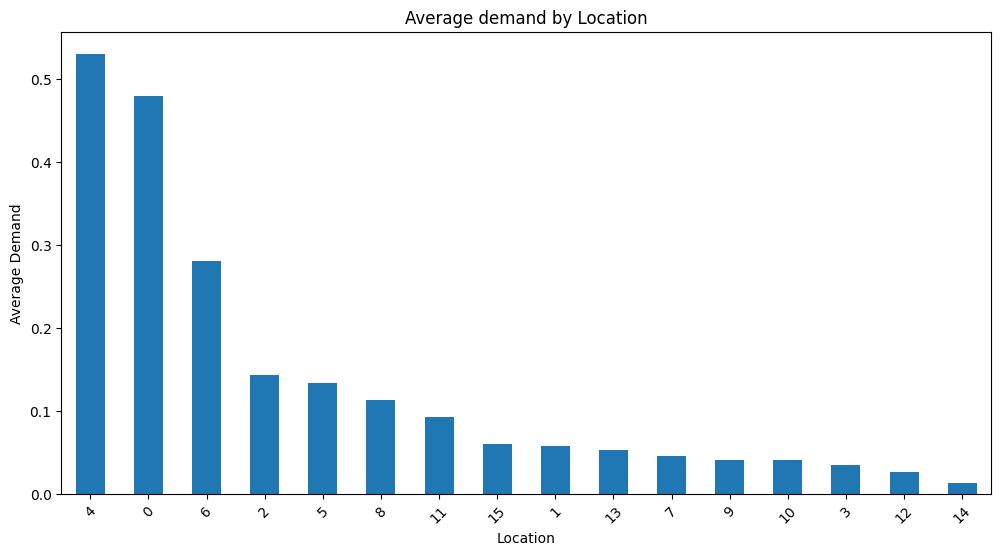

In [32]:
plt.figure(figsize=(12,6))
avg_demand_subba.plot(kind='bar')
plt.xlabel('Location')
plt.ylabel('Average Demand')
plt.title('Average demand by Location')
plt.xticks(rotation = 45)

## Average Demand per Month

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, '6'),
  Text(1, 0, '7'),
  Text(2, 0, '8'),
  Text(3, 0, '9'),
  Text(4, 0, '10'),
  Text(5, 0, '11'),
  Text(6, 0, '12')])

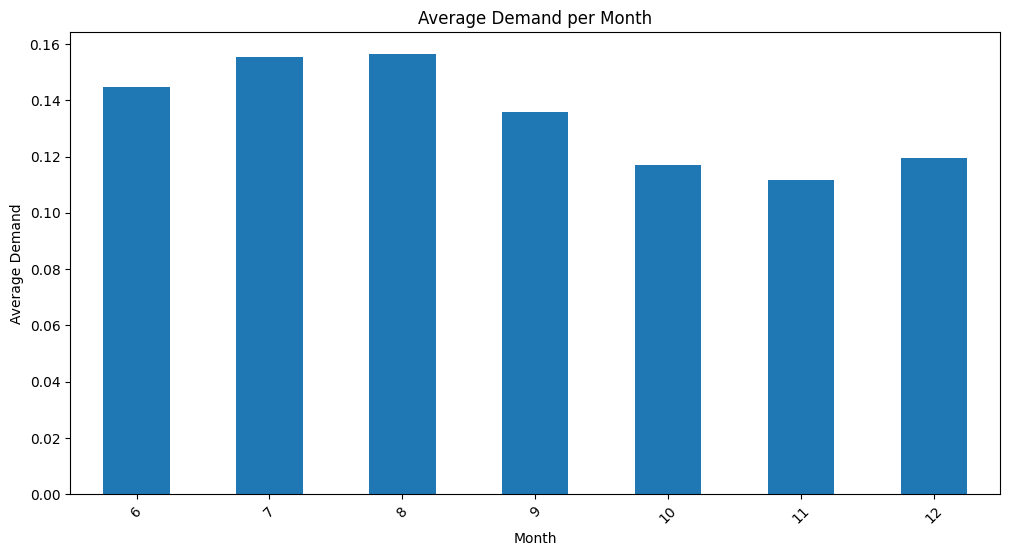

In [33]:
month_demand_group = df_clean.groupby('month')
avg_demand_month = month_demand_group['value'].mean()

plt.figure(figsize = (12,6))
avg_demand_month.plot(kind = 'bar')
plt.xlabel('Month')
plt.ylabel('Average Demand')
plt.title('Average Demand per Month')
plt.xticks(rotation = 45)

# **Feature Selection**

## Correlation between Weather Factors and Demand Value

In [34]:
df_clean.columns

Index(['datetime', 'tempF', 'windspeedMiles', 'weatherCode', 'precipMM',
       'precipInches', 'humidity', 'visibility', 'visibilityMiles', 'pressure',
       'pressureInches', 'cloudcover', 'HeatIndexC', 'HeatIndexF', 'DewPointC',
       'DewPointF', 'WindChillC', 'WindChillF', 'WindGustMiles',
       'WindGustKmph', 'FeelsLikeC', 'FeelsLikeF', 'uvIndex', 'subba-name',
       'value', 'value-units', 'zone', 'tempF_rolling_mean',
       'tempF_rolling_std', 'windspeedMiles_rolling_mean',
       'windspeedMiles_rolling_std', 'humidity_rolling_mean',
       'humidity_rolling_std', 'tempF_lag_2', 'windspeedMiles_lag_2',
       'humidity_lag_2', 'tempF_lag_4', 'windspeedMiles_lag_4',
       'humidity_lag_4', 'tempF_lag_6', 'windspeedMiles_lag_6',
       'humidity_lag_6', 'month', 'month_sin', 'month_cos'],
      dtype='object')

In [35]:
df_clean.drop(columns=['month'], inplace=True)


In [36]:
df_clean.columns

Index(['datetime', 'tempF', 'windspeedMiles', 'weatherCode', 'precipMM',
       'precipInches', 'humidity', 'visibility', 'visibilityMiles', 'pressure',
       'pressureInches', 'cloudcover', 'HeatIndexC', 'HeatIndexF', 'DewPointC',
       'DewPointF', 'WindChillC', 'WindChillF', 'WindGustMiles',
       'WindGustKmph', 'FeelsLikeC', 'FeelsLikeF', 'uvIndex', 'subba-name',
       'value', 'value-units', 'zone', 'tempF_rolling_mean',
       'tempF_rolling_std', 'windspeedMiles_rolling_mean',
       'windspeedMiles_rolling_std', 'humidity_rolling_mean',
       'humidity_rolling_std', 'tempF_lag_2', 'windspeedMiles_lag_2',
       'humidity_lag_2', 'tempF_lag_4', 'windspeedMiles_lag_4',
       'humidity_lag_4', 'tempF_lag_6', 'windspeedMiles_lag_6',
       'humidity_lag_6', 'month_sin', 'month_cos'],
      dtype='object')

In [37]:
df_clean.dtypes

,0
datetime,datetime64[ns]
tempF,float64
windspeedMiles,float64
weatherCode,float64
precipMM,float64
precipInches,float64
humidity,float64
visibility,float64
visibilityMiles,float64
pressure,float64


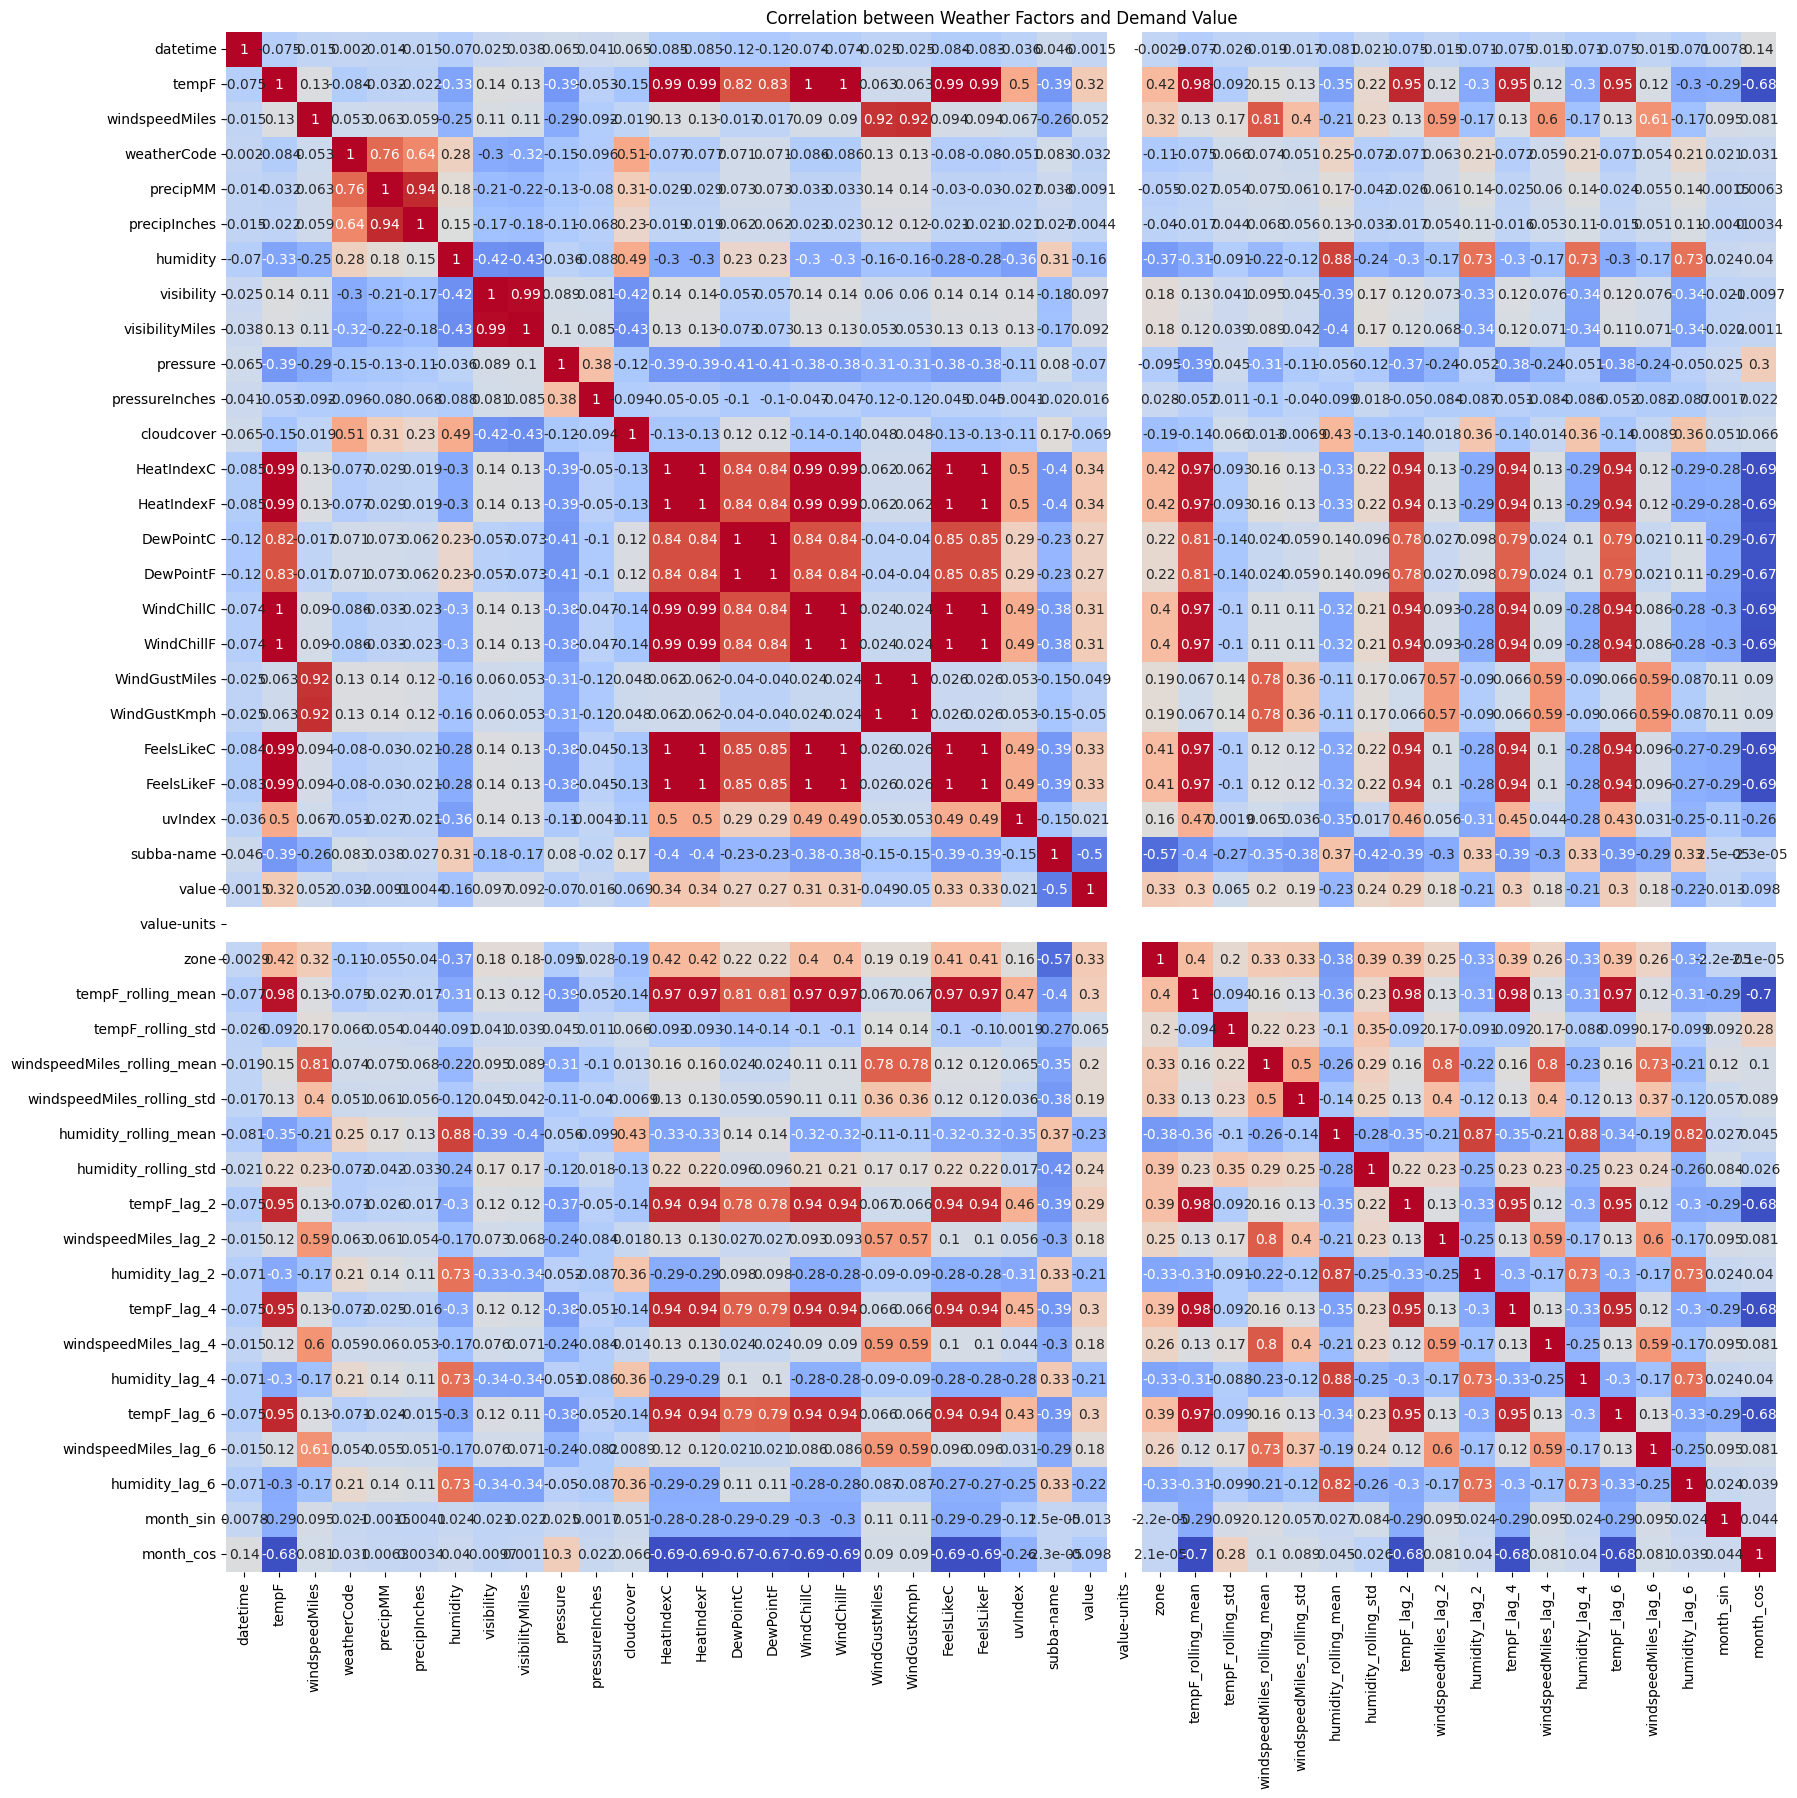

In [38]:
# Calculate the correlation matrix
weather_corr = df_clean.corr()

# Plot the correlation heatmap
plt.figure(figsize=(20,20))
sns.heatmap(weather_corr, annot=True, cmap='coolwarm', cbar=False)
plt.title('Correlation between Weather Factors and Demand Value')
plt.show()


In [39]:
# Step 1: Find pairs of features with correlation > 0.7
threshold = 0.7
high_corr_pairs = [(weather_corr.columns[i], weather_corr.columns[j], weather_corr.iloc[i, j])
                   for i in range(len(weather_corr.columns)) for j in range(i)
                   if abs(weather_corr.iloc[i, j]) > threshold]

# Step 2: Evaluate how each feature in the pair is correlated with 'value'
print("Highly correlated feature pairs and their correlation with 'value':")
for feature1, feature2, corr_value in high_corr_pairs:
    corr_feature1_value = weather_corr.loc[feature1, 'value']
    corr_feature2_value = weather_corr.loc[feature2, 'value']
    print(f"Pair: {feature1} and {feature2} - Correlation: {corr_value:.2f}")
    print(f"  {feature1} with 'value': {corr_feature1_value:.2f}")
    print(f"  {feature2} with 'value': {corr_feature2_value:.2f}")

    # Compare correlations with 'value' and suggest which to keep
    if abs(corr_feature1_value) > abs(corr_feature2_value):
        print(f"  => {feature1} is more correlated with 'value', consider keeping it.")
    else:
        print(f"  => {feature2} is more correlated with 'value', consider keeping it.")
    print('-' * 80)

Highly correlated feature pairs and their correlation with 'value':
Pair: precipMM and weatherCode - Correlation: 0.76
  precipMM with 'value': -0.01
  weatherCode with 'value': -0.03
  => weatherCode is more correlated with 'value', consider keeping it.
--------------------------------------------------------------------------------
Pair: precipInches and precipMM - Correlation: 0.94
  precipInches with 'value': -0.00
  precipMM with 'value': -0.01
  => precipMM is more correlated with 'value', consider keeping it.
--------------------------------------------------------------------------------
Pair: visibilityMiles and visibility - Correlation: 0.99
  visibilityMiles with 'value': 0.09
  visibility with 'value': 0.10
  => visibility is more correlated with 'value', consider keeping it.
--------------------------------------------------------------------------------
Pair: HeatIndexC and tempF - Correlation: 0.99
  HeatIndexC with 'value': 0.34
  tempF with 'value': 0.32
  => HeatIndex

Looking at the plot - it can be decided to drop
1. 'DewPointF', 'WindChillF', 'HeatIndexF', 'FeelsLikeF' and 'tempF' - are highly correlated
2. 'windspeedMiles' and 'WindGustMiles' are also highly correlated with each other

Considering how they are correlated with the target variable ('Value') - we will drop few features

Should look into ERCO - Far West

## Variance Inflation Factor (VIF)

In [40]:
from statsmodels.stats. outliers_influence import variance_inflation_factor

features = df_clean.drop(columns=['value'])
vif_data = pd.DataFrame()
vif_data['features'] = features.columns

vif_data['VIF'] = [variance_inflation_factor(features.values, i) for i in range(features.shape[1])]

vif_data

TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

1. Very High VIF - tempF, HeatIndexF, WindChillF, FeelsLikeF
2. Moderate VIF - windspeedMiles, humidity, visibilityMiles,pressure, DewPointF, WindGustMiles
3. Low VIF - precipMM, cloudcover, uvindex


So the columns initially which can be considered are - 'datetime', 'tempF', 'windspeedMiles', 'precipMM', 'humidity', 'visibilityMiles', 'pressure', 'cloudcover', 'HeatIndexF', 'DewPointF', 'WindChillF', 'WindGustMiles', 'FeelsLikeF', 'uvIndex', 'subba-name','value', 'value-units', 'zone', 'Month' - Dropping selected columns as few features are captured in different units


The rest few columns to be dropped is yet to be decided based on other factors

In [41]:
df_clean.head()

,datetime,tempF,windspeedMiles,weatherCode,precipMM,precipInches,humidity,visibility,visibilityMiles,pressure,...,windspeedMiles_lag_2,humidity_lag_2,tempF_lag_4,windspeedMiles_lag_4,humidity_lag_4,tempF_lag_6,windspeedMiles_lag_6,humidity_lag_6,month_sin,month_cos
0,2019-06-05 17:00:00,0.763158,0.212121,0.000000,0.000000,0.0,0.354839,1.0,1.000000,0.500000,...,0.121212,0.655914,0.719298,0.333333,0.623656,0.728070,0.363636,0.795699,0.5,0.0
1,2019-06-05 17:00:00,0.675439,0.303030,0.244186,0.014634,0.0,0.838710,1.0,1.000000,0.527778,...,0.333333,0.526882,0.745614,0.181818,0.591398,0.754386,0.181818,0.193548,0.5,0.0
2,2019-06-05 18:00:00,0.728070,0.121212,0.011628,0.000000,0.0,0.698925,0.9,0.833333,0.500000,...,0.212121,0.354839,0.745614,0.121212,0.655914,0.719298,0.333333,0.623656,0.5,0.0
3,2019-06-05 18:00:00,0.745614,0.303030,0.000000,0.000000,0.0,0.354839,1.0,1.000000,0.486111,...,0.303030,0.838710,0.798246,0.333333,0.526882,0.745614,0.181818,0.591398,0.5,0.0
4,2019-06-05 18:00:00,0.789474,0.363636,0.011628,0.000000,0.0,0.537634,0.9,0.833333,0.486111,...,0.121212,0.698925,0.763158,0.212121,0.354839,0.745614,0.121212,0.655914,0.5,0.0


In [42]:
df_clean['value-units'].value_counts()

,count
value-units,
0,324994


In [43]:
column_names = df_clean.columns.tolist()
print(column_names)

['datetime', 'tempF', 'windspeedMiles', 'weatherCode', 'precipMM', 'precipInches', 'humidity', 'visibility', 'visibilityMiles', 'pressure', 'pressureInches', 'cloudcover', 'HeatIndexC', 'HeatIndexF', 'DewPointC', 'DewPointF', 'WindChillC', 'WindChillF', 'WindGustMiles', 'WindGustKmph', 'FeelsLikeC', 'FeelsLikeF', 'uvIndex', 'subba-name', 'value', 'value-units', 'zone', 'tempF_rolling_mean', 'tempF_rolling_std', 'windspeedMiles_rolling_mean', 'windspeedMiles_rolling_std', 'humidity_rolling_mean', 'humidity_rolling_std', 'tempF_lag_2', 'windspeedMiles_lag_2', 'humidity_lag_2', 'tempF_lag_4', 'windspeedMiles_lag_4', 'humidity_lag_4', 'tempF_lag_6', 'windspeedMiles_lag_6', 'humidity_lag_6', 'month_sin', 'month_cos']


In [44]:
selected_df = df_clean[[
    'precipMM',
    'weatherCode',
    'visibility',
    'HeatIndexF',
    'WindChillF',
    'windspeedMiles',
    'FeelsLikeF',
    'tempF_rolling_mean',
    'windspeedMiles_rolling_mean',
    'humidity_rolling_mean',
    'value',
    'pressure',
    'pressureInches',
    'cloudcover',
    'uvIndex',
    'subba-name',
    'zone',
    'tempF_rolling_std',
    'windspeedMiles_rolling_std',
    'humidity_rolling_std',
    'month_sin',
    'month_cos'
]]





In [45]:
selected_df.head()

,precipMM,weatherCode,visibility,HeatIndexF,WindChillF,windspeedMiles,FeelsLikeF,tempF_rolling_mean,windspeedMiles_rolling_mean,humidity_rolling_mean,...,pressureInches,cloudcover,uvIndex,subba-name,zone,tempF_rolling_std,windspeedMiles_rolling_std,humidity_rolling_std,month_sin,month_cos
0,0.000000,0.000000,1.0,0.741667,0.795455,0.212121,0.775362,0.772194,0.273333,0.453668,...,0.5,0.15,0.6,7,15,0.112552,0.264432,0.440502,0.5,0.0
1,0.014634,0.244186,1.0,0.683333,0.719697,0.303030,0.724638,0.757119,0.300000,0.569498,...,0.5,0.93,0.4,1,9,0.179170,0.268646,0.387357,0.5,0.0
2,0.000000,0.011628,0.9,0.741667,0.765152,0.121212,0.775362,0.758794,0.253333,0.583012,...,0.5,0.35,0.0,6,13,0.175790,0.272280,0.400189,0.5,0.0
3,0.000000,0.000000,1.0,0.733333,0.780303,0.303030,0.768116,0.758794,0.280000,0.540541,...,0.5,0.13,0.0,7,15,0.175790,0.288310,0.476126,0.5,0.0
4,0.000000,0.011628,0.9,0.841667,0.818182,0.363636,0.862319,0.767169,0.333333,0.519305,...,0.5,0.51,0.0,5,14,0.194576,0.272280,0.465688,0.5,0.0


In [ ]:
from sklearn.model_selection import train_test_split

# Separate features and target variable
X = selected_df.drop('value', axis=1)  # Features (drop the target column 'value')
y = selected_df['value']  # Target variable (the 'value' column)

# Split the data: 80% for training, 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Output the shapes of the splits
print("Training set:", X_train.shape, y_train.shape)
print("Test set:", X_test.shape, y_test.shape)



Training set: (259995, 21) (259995,)
Test set: (64999, 21) (64999,)


# Model Building and Training

Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Initialize the Linear Regression model
lin_reg = LinearRegression()

# Fit the model on the training data
lin_reg.fit(X_train, y_train)

# Make predictions on the test data
y_test_pred = lin_reg.predict(X_test)

# Evaluate the model on the test set
print("Linear Regression Test Set Metrics:")
print("Mean Squared Error (MSE):", mean_squared_error(y_test, y_test_pred))
print("Mean Absolute Error (MAE):", mean_absolute_error(y_test, y_test_pred))
print("R-squared (R²):", r2_score(y_test, y_test_pred))


Linear Regression Test Set Metrics:
Mean Squared Error (MSE): 0.015979519600758673
Mean Absolute Error (MAE): 0.08713334482924483
R-squared (R²): 0.3777681153859339


Lasso Regression

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Initialize the Lasso model with an alpha (regularization strength)
lasso_reg = Lasso(alpha=0.1)

# Fit the model on the training data
lasso_reg.fit(X_train, y_train)

# Make predictions on the test data
y_test_pred = lasso_reg.predict(X_test)

# Evaluate the model on the test set
print("Lasso Regression Test Set Metrics:")
print("Mean Squared Error (MSE):", mean_squared_error(y_test, y_test_pred))
print("Mean Absolute Error (MAE):", mean_absolute_error(y_test, y_test_pred))
print("R-squared (R²):", r2_score(y_test, y_test_pred))


Lasso Regression Test Set Metrics:
Mean Squared Error (MSE): 0.019662974114305416
Mean Absolute Error (MAE): 0.09523828437146001
R-squared (R²): 0.234336842036167


LSTM (Vanilla)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [ ]:
X_train = X_train.to_numpy().reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.to_numpy().reshape((X_test.shape[0], 1, X_test.shape[1]))

y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

In [ ]:
lstm_model = Sequential()
lstm_model.add(LSTM(50, activation = 'relu', input_shape = (1, X.shape[1])))
lstm_model.add(Dense(1))
lstm_model.compile(optimizer = 'adam', loss = 'mse')

lstm_model.fit(X_train, y_train, epochs = 200, verbose = 1)

y_test_pred = lstm_model.predict(X_test)

# Evaluate the model on the test set
print("LSTM Model Test Set Metrics:")
print("Mean Squared Error (MSE):", mean_squared_error(y_test, y_test_pred))
print("Mean Absolute Error (MAE):", mean_absolute_error(y_test, y_test_pred))
print("R-squared (R²):", r2_score(y_test, y_test_pred))

Epoch 1/200
8125/8125 ━━━━━━━━━━━━━━━━━━━━ 22s 2ms/step - loss: 0.0082
Epoch 2/200
8125/8125 ━━━━━━━━━━━━━━━━━━━━ 20s 3ms/step - loss: 9.6632e-04
Epoch 3/200
8125/8125 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step - loss: 8.7873e-04
Epoch 4/200
8125/8125 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step - loss: 8.2578e-04
Epoch 5/200
8125/8125 ━━━━━━━━━━━━━━━━━━━━ 22s 3ms/step - loss: 7.9337e-04
Epoch 6/200
8125/8125 ━━━━━━━━━━━━━━━━━━━━ 43s 3ms/step - loss: 7.4536e-04
Epoch 7/200
8125/8125 ━━━━━━━━━━━━━━━━━━━━ 38s 2ms/step - loss: 7.1942e-04
Epoch 8/200
8125/8125 ━━━━━━━━━━━━━━━━━━━━ 22s 3ms/step - loss: 7.1113e-04
Epoch 9/200
8125/8125 ━━━━━━━━━━━━━━━━━━━━ 39s 2ms/step - loss: 6.9881e-04
Epoch 10/200
8125/8125 ━━━━━━━━━━━━━━━━━━━━ 21s 3ms/step - loss: 6.8227e-04
Epoch 11/200
8125/8125 ━━━━━━━━━━━━━━━━━━━━ 38s 2ms/step - loss: 6.5917e-04
Epoch 12/200
8125/8125 ━━━━━━━━━━━━━━━━━━━━ 22s 2ms/step - loss: 6.5707e-04
Epoch 13/200
8125/8125 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step - loss: 6.5085e-04
Epoch 14/200
8125/8125 ━━

In [ ]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (64000, 1, 14)
X_test shape: (16000, 1, 14)
y_train shape: (64000,)
y_test shape: (16000,)


In [ ]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Assuming X_train, X_test, y_train, y_test are already scaled and split

# Define n_timesteps and n_features based on your data
n_timesteps = X_train.shape[1]  # Set based on your data
n_features = X_train.shape[2]   # Number of features

# Model building
lstm_model = Sequential()

# Add the LSTM layers and dropout layers
lstm_model.add(LSTM(100, activation='relu', return_sequences=True, input_shape=(n_timesteps, n_features)))
lstm_model.add(Dropout(0.2))
lstm_model.add(LSTM(50, activation='relu'))
lstm_model.add(Dropout(0.2))

# Output layer
lstm_model.add(Dense(1))

# Compile the model with Adam optimizer and MSE loss
optimizer = Adam(learning_rate=0.001)
lstm_model.compile(optimizer=optimizer, loss='mse')

# Early stopping to avoid overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Fit the model
lstm_model.fit(X_train, y_train, epochs=200, batch_size=32, validation_split=0.2, callbacks=[early_stopping], verbose=1)

# Make predictions on the test set
y_test_pred = lstm_model.predict(X_test)

# Evaluate model performance
mse = mean_squared_error(y_test, y_test_pred)
mae = mean_absolute_error(y_test, y_test_pred)
r2 = r2_score(y_test, y_test_pred)

print(f'Mean Squared Error (MSE): {mse}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'R-squared (R²): {r2}')


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/200
1600/1600 ━━━━━━━━━━━━━━━━━━━━ 15s 5ms/step - loss: 0.0269 - val_loss: 0.0231
Epoch 2/200
1600/1600 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 0.0233 - val_loss: 0.0222
Epoch 3/200
1600/1600 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - loss: 0.0224 - val_loss: 0.0214
Epoch 4/200
1600/1600 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - loss: 0.0216 - val_loss: 0.0217
Epoch 5/200
1600/1600 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - loss: 0.0215 - val_loss: 0.0211
Epoch 6/200
1600/1600 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - loss: 0.0209 - val_loss: 0.0212
Epoch 7/200
1600/1600 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - loss: 0.0212 - val_loss: 0.0209
Epoch 8/200
1600/1600 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - loss: 0.0214 - val_loss: 0.0211
Epoch 9/200
1600/1600 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - loss: 0.0211 - val_loss: 0.0208
Epoch 10/200
1600/1600 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - loss: 0.0205 - val_loss: 0.0208
Epoch 11/200
1600/1600 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - loss: 0.0213 - val_loss: 0.0208
Epoch 12/200
16